In [1]:
import math
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

%matplotlib inline

# Useful directory path.
root_dir = f'{os.getcwd()}/../results'
graphics_dir = f'{root_dir}/graphics'

# GP tools.
tools = ('DEAP', 'TensorGP (CPU)', 'TensorGP (GPU)', 'Operon')

# Function sets.
function_sets = {
    'nicolau_a': (4, 7, 255, 2),
    'nicolau_b': (6, 5, 63, 1),
    'nicolau_c': (9, 5, 63, 1)
}

# Numbers of fitness cases.
num_fitness_cases = (10, 100, 1000, 10000, 100000)

# Number of programs per size bin.
nppsb = 2

# Program dictionary.
with open(f'{root_dir}/programs/programs.pkl', 'rb') as f:
    program_dict = pickle.load(f) 

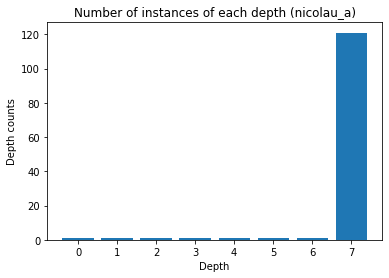

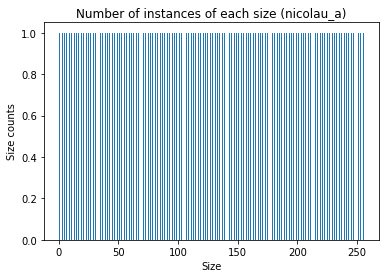

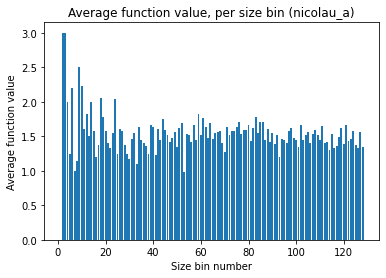

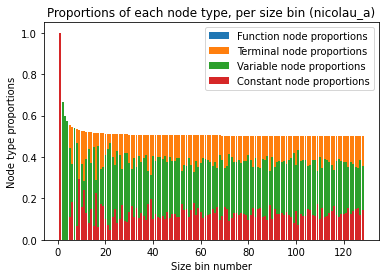

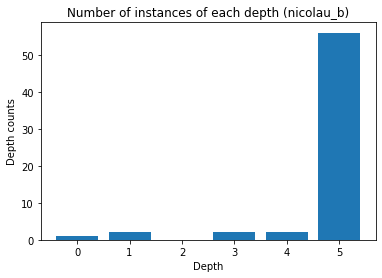

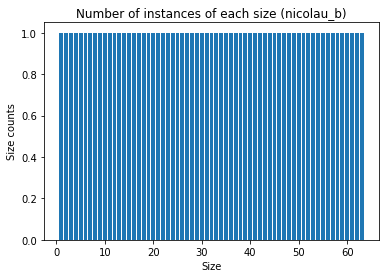

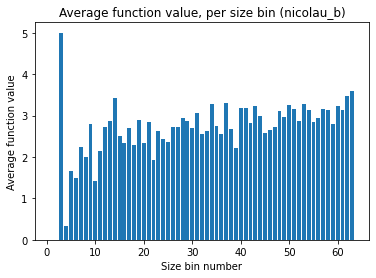

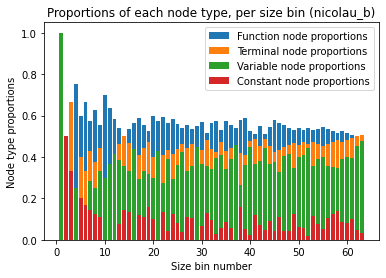

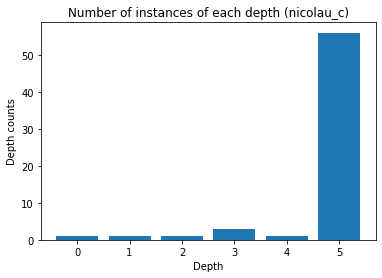

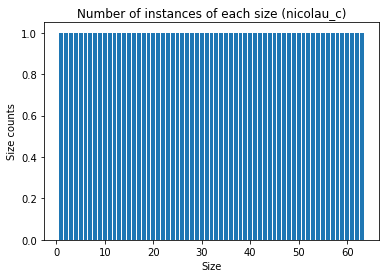

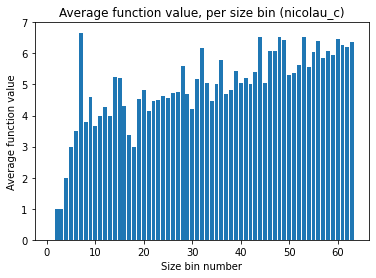

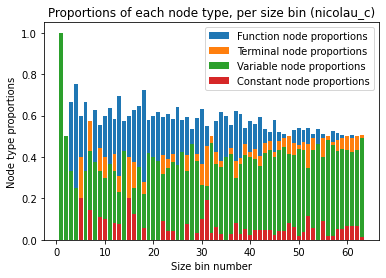

In [2]:
# Compute some statistics for the set of random programs
# generated for each function set.

# Program sizes for each size bin, for each function set.
program_sizes = []

for name, (num_functions, max_depth, max_size, bin_size) in (
    function_sets.items()):
    # For each function set...

    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # List where the `i`-th element, `0 <= i <= max_depth`, 
    # is to represent the number of instances for depth `i` 
    # over all random programs (i.e., from all size bins) 
    # for the function set with name `name`.
    depth_counts = [0]*(max_depth+1)

    # List where the `i`-th element, `0 <= i <= max_size-1`, 
    # is to represent the number of instances for size `i+1` 
    # over all random programs (i.e., from all size bins) 
    # for the function set with name `name`.
    size_counts = [0]*(max_size)

    # Lists where the `i`-th element contains the proportion
    # of the total number of nodes for size bin `i` that are 
    # functions/variables/constants/terminals.
    function_node_proportions = []
    variable_node_proportions = []
    constant_node_proportions = []
    terminal_node_proportions = []
    
    # List where the `i`-th element is to represent the 
    # "average function value" for size bin `i`, where 
    # this value is defined here to be the sum of the 
    # numbers of instances of each function type, with 
    # the `i`-th function type (specified by the `function_
    # counts` list) multiplied by `i`, all divided by the 
    # number of function types.
    #
    # In general, if the numbers of instances of function 
    # types are uniformly distributed for each size bin, 
    # the "average function value" as defined above should 
    # be equal to the number of function types minus one,
    # divided by 2. Thus, we can check for such uniformity
    # for each size bin by inspecting such an average value.
    average_function_values = []

    # Prepare for sizes related to the function set.
    program_sizes.append([])

    # Compute the relevant list elements.
    for (programs, depths, sizes, function_counts, 
        variable_counts, constant_counts) in (program_dict[name]
            [0:num_size_bins]):

        for depth in depths: depth_counts[depth] += 1
        for size in sizes: size_counts[size-1] += 1

        function_node_sum = sum(function_counts)
        variable_node_sum = sum(variable_counts)
        constant_node_sum = sum(constant_counts)
        terminal_node_sum = variable_node_sum + constant_node_sum
        node_sum = function_node_sum + terminal_node_sum

        function_node_proportions.append(function_node_sum/node_sum)
        variable_node_proportions.append(variable_node_sum/node_sum)
        constant_node_proportions.append(constant_node_sum/node_sum)
        terminal_node_proportions.append(terminal_node_sum/node_sum)
 
        average_function_value = (0) if (function_node_sum == 0) else (
            sum([i*function_counts[i] for i in range(
                num_functions)])/function_node_sum)

        average_function_values.append(average_function_value)

        # Add representative size from size bin.
        program_sizes[-1].append(sizes[0])

    # Compute/plot some relevant statistics for the number 
    # of instances of each possible program depth.

    # print('Program depths: ', depth_counts)
    # print('Mean of depth counts: ', np.mean(depth_counts))
    # print('Variance of depth counts: ', np.var(depth_counts))
    # print('Standard deviation of depth counts: ', np.std(depth_counts))
    # print(stats.chisquare(depth_counts))

    # Plot bar graph of depth counts.
    index = range(0, max_depth+1)
    plt.bar(index, depth_counts)
    plt.xlabel('Depth')
    plt.ylabel('Depth counts')
    plt.title('Number of instances of each depth ('+name+')')
    plt.savefig(f'{graphics_dir}/{name}/depths.svg')
    plt.show()


    # Compute/plot some relevant statistics for the number 
    # of instances of each possible program size.

    # print('Program sizes: ', size_counts)
    # print('Mean of size counts: ', np.mean(size_counts))
    # print('Variance of size counts: ', np.var(size_counts))
    # print('Standard deviation of size counts: ', np.std(size_counts))
    # print(stats.chisquare(size_counts))

    # Plot bar graph of size counts.
    index = range(1, max_size+1)
    plt.bar(index, size_counts)
    plt.xlabel('Size')
    plt.ylabel('Size counts')
    plt.title('Number of instances of each size ('+name+')')
    plt.savefig(f'{graphics_dir}/{name}/sizes.svg')
    plt.show()


    # Compute/plot some relevant statistics for the average
    # function values.

    # print('Average function values: ', average_function_values)
    # print('Mean of average function values: ', 
    #     np.mean(average_function_values))
    # print('Variance of average function values: ', 
    #     np.var(average_function_values))
    # print('Standard deviation of average function values: ', 
    #     np.std(average_function_values))
    # print(stats.chisquare(average_function_values))

    # Plot bar graph of average function values.
    index = range(1, num_size_bins+1)

    #log_approx = [4*(1/log(max_size,2))*log(max_size/x,2) + 
    #    10.5*(1/log(max_size,2))*log(x, 2) for x in index]

    #plt.plot(index, log_approx)
    plt.bar(index, average_function_values)

    plt.xlabel('Size bin number')
    plt.ylabel('Average function value')
    plt.title('Average function value, per size bin ('+name+')')
    plt.savefig(f'{graphics_dir}/{name}/average_function_values.svg')
    plt.show()


    # Compute/plot some relevant statistics for proportions
    # of the total number of nodes with particular node types.

    # print('Function node proportions: ', function_node_proportions)
    # print('Terminal node proportions: ', terminal_node_proportions)
    # print('Variable node proportions: ', variable_node_proportions)
    # print('Constant node proportions: ', constant_node_proportions)


    # Plot bar graph of function counts.
    index = range(1, num_size_bins+1)
    plt.bar(index, function_node_proportions, 
        label='Function node proportions')
    plt.bar(index, terminal_node_proportions, 
        label='Terminal node proportions')
    plt.bar(index, variable_node_proportions, 
        label='Variable node proportions')
    plt.bar(index, constant_node_proportions, 
        label='Constant node proportions')
    plt.xlabel('Size bin number')
    plt.ylabel('Node type proportions')
    plt.title('Proportions of each node type, per size bin ('+name+')')
    plt.legend(loc='upper right')
    plt.savefig(f'{graphics_dir}/{name}/node_proportions.svg')
    plt.show()

In [25]:
# Average of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set,
# for each tool.
avg_med_avg_runtimes = []

# Median of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set,
# for each tool.
med_med_avg_runtimes = []

# Minimum of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set,
# for each tool.
min_med_avg_runtimes = []

# Maximum of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set,
# for each tool.
max_med_avg_runtimes = []

# Standard deviation of *median average runtimes* for each size 
# bin, for each number of fitness cases, for each function set,
# for each tool.
std_dev_med_avg_runtimes = []

# Interquartile range of *median average runtimes* for each size 
# bin, for each number of fitness cases, for each function set,
# for each tool.
iqr_med_avg_runtimes = []

# Median node evaluations per second (NEPS) from *median average
# runtimes* for each size bin, for each number of fitness cases, 
# for each function set, for each tool.
med_neps = []

# Median of median node evaluations per second (NEPS) for each 
# size bin, for each number of fitness cases, for each function 
# set, for each tool.
med_med_neps = []

# Interquartile range of median node evaluations per second (NEPS) 
# for each size bin, for each number of fitness cases, for each 
# function set, for each tool.
iqr_med_neps = []

In [26]:
####################################################################

# Compute statistics for DEAP.

with open(f'{root_dir}/results_deap.pkl', 'rb') as f:
    med_avg_runtimes = pickle.load(f)

# Prepare for statistics related to the tool.
avg_med_avg_runtimes.append([])
med_med_avg_runtimes.append([])
min_med_avg_runtimes.append([])
max_med_avg_runtimes.append([])
std_dev_med_avg_runtimes.append([])
iqr_med_avg_runtimes.append([])
med_neps.append([])
med_med_neps.append([])
iqr_med_neps.append([])

for i, (name, (num_functions, max_depth, max_size, bin_size)) in enumerate(
    function_sets.items()):
    # For each function set...
    print(f'For function set `{name}`...')

    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Prepare for statistics related to the function set.
    avg_med_avg_runtimes[-1].append([])
    med_med_avg_runtimes[-1].append([])
    min_med_avg_runtimes[-1].append([])
    max_med_avg_runtimes[-1].append([])
    std_dev_med_avg_runtimes[-1].append([])
    iqr_med_avg_runtimes[-1].append([])
    med_neps[-1].append([])
    med_med_neps[-1].append([])
    iqr_med_neps[-1].append([])

    for j, nfc in enumerate(num_fitness_cases):
        # For each number of fitness cases...
        print(f'For number of fitness cases `{nfc}`...')

        # Average of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        avg_med_avg_runtimes[-1][-1].append(
            [np.mean(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Averages of median average runtimes:', 
            avg_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Median of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        med_med_avg_runtimes[-1][-1].append(
            [np.median(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Medians of median average runtimes:', 
            med_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Minimum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        min_med_avg_runtimes[-1][-1].append(
            [min(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Minimums of median average runtimes:', 
            min_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Maximum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        max_med_avg_runtimes[-1][-1].append(
            [max(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Maximums of median average runtimes:', 
            max_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Standard deviation of *median average runtimes* for each 
        # size bin, relevant to the number of fitness cases.
        std_dev_med_avg_runtimes[-1][-1].append(
            [np.std(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Standard deviations of median average runtimes:', 
            std_dev_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Interquartile range of *median average runtimes* for each 
        # size bin, relevant to the number of fitness cases.
        iqr_med_avg_runtimes[-1][-1].append(
            [stats.iqr(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Interquartile range of median average runtimes:', 
            iqr_med_avg_runtimes[-1][-1][-1])
        print('\n\n')

        print('Program sizes:', program_sizes[i])

        # Number of nodes per size bin.
        num_nodes = [(nppsb * size * nfc) for size in program_sizes[i]]

        # Median node evaluations per second (NEPS) from *median 
        # average runtimes*, for each size bin, relevant to the 
        # number of fitness cases.
        med_neps[-1][-1].append([[num_nodes_ / med_avg_runtime
            for med_avg_runtime in med_avg_runtimes[i][j][k]]
            for k, num_nodes_ in enumerate(num_nodes)])
        print('Median node evaluations per second:', med_neps[-1][-1][-1])
        print('\n')

        # Median node evaluations per second (NEPS) of *median 
        # average runtimes*, for each size bin, relevant to the 
        # number of fitness cases.
        med_med_neps[-1][-1].append([np.median(med_neps_)
            for med_neps_ in med_neps[-1][-1][-1]])
        print('Median of median node evaluations per second:', 
            med_med_neps[-1][-1][-1])
        print('\n')

        # Interquartile range of median node evaluations per second 
        # (NEPS), for each size bin, relevant to the number of fitness 
        # cases.
        iqr_med_neps[-1][-1].append([stats.iqr(med_neps_)
            for med_neps_ in med_neps[-1][-1][-1]])
        print('Interquartile range of median node evaluations per second:', 
            iqr_med_neps[-1][-1][-1])
        print('\n')

For function set `nicolau_a`...
For number of fitness cases `10`...
Averages of median average runtimes: [0.04821375757455826, 0.004988746717572212, 0.004636911675333977, 0.00525231659412384, 0.004968561232089996, 0.004694327712059021, 0.004629997536540031, 0.0046512410044670105, 0.004920952022075653, 0.0047834813594818115, 0.004795702174305916, 0.004864858463406563, 0.004851991310715675, 0.004880920052528381, 0.0047172605991363525, 0.005066027864813805, 0.004728382453322411, 0.005020748823881149, 0.004976244643330574, 0.004874523729085922, 0.004937151446938515, 0.00486784428358078, 0.0050704143941402435, 0.0046621933579444885, 0.003341054543852806, 0.0032914970070123672, 0.0036199092864990234, 0.003356965258717537, 0.003311809152364731, 0.0034045521169900894, 0.0035787690430879593, 0.0032913237810134888, 0.0035691913217306137, 0.003406580537557602, 0.003843320533633232, 0.0036426521837711334, 0.0036720074713230133, 0.0035869572311639786, 0.0035888049751520157, 0.0034680943936109543, 0

In [27]:
####################################################################

# Compute statistics for TensorGP.

with open(f'{root_dir}/results_tensorgp.pkl', 'rb') as f:
    med_avg_runtimes = pickle.load(f)

for i, device in enumerate(('CPU', 'GPU')):
    # For each device...
    print(f'For device `{device}`...')

    # Prepare for statistics related to the tool.
    avg_med_avg_runtimes.append([])
    med_med_avg_runtimes.append([])
    min_med_avg_runtimes.append([])
    max_med_avg_runtimes.append([])
    std_dev_med_avg_runtimes.append([])
    iqr_med_avg_runtimes.append([])
    med_neps.append([])
    med_med_neps.append([])
    iqr_med_neps.append([])

    for j, (name, (num_functions, max_depth, max_size, bin_size)) in enumerate(
        function_sets.items()):
        # For each function set...
        print(f'For function set `{name}`...')

        # Number of "size bins."
        num_size_bins = int(math.ceil(max_size/bin_size))

        # Prepare for statistics related to the function set.
        avg_med_avg_runtimes[-1].append([])
        med_med_avg_runtimes[-1].append([])
        min_med_avg_runtimes[-1].append([])
        max_med_avg_runtimes[-1].append([])
        std_dev_med_avg_runtimes[-1].append([])
        iqr_med_avg_runtimes[-1].append([])
        med_neps[-1].append([])
        med_med_neps[-1].append([])
        iqr_med_neps[-1].append([])

        for k, nfc in enumerate(num_fitness_cases):
            # For each number of fitness cases...
            print(f'For number of fitness cases `{nfc}`...')


            # Average of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            avg_med_avg_runtimes[-1][-1].append(
                [np.mean(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Averages of median average runtimes:', 
                avg_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Median of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            med_med_avg_runtimes[-1][-1].append(
                [np.median(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Medians of median average runtimes:', 
                med_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Minimum of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            min_med_avg_runtimes[-1][-1].append(
                [min(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Minimums of median average runtimes:', 
                min_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Maximum of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            max_med_avg_runtimes[-1][-1].append(
                [max(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Maximums of median average runtimes:', 
                max_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Standard deviation of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            std_dev_med_avg_runtimes[-1][-1].append(
                [np.std(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Standard deviations of median average runtimes:', 
                std_dev_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Interquartile range of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            iqr_med_avg_runtimes[-1][-1].append(
                [stats.iqr(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Interquartile range of median average runtimes:', 
                iqr_med_avg_runtimes[-1][-1][-1])
            print('\n\n')

            print('Program sizes:', program_sizes[j])

            # Number of nodes per size bin.
            num_nodes = [(nppsb * size * nfc) for size in program_sizes[j]]

            # Median node evaluations per second (NEPS) from *median 
            # average runtimes*, for each size bin, relevant to the 
            # number of fitness cases.
            med_neps[-1][-1].append([[num_nodes_ / med_avg_runtime
                for med_avg_runtime in med_avg_runtimes[i][j][k][m]]
                for m, num_nodes_ in enumerate(num_nodes)])
            print('Median node evaluations per second:', 
                med_neps[-1][-1][-1])
            print('\n')

            # Median node evaluations per second (NEPS) of *median 
            # average runtimes*, for each size bin, relevant to the 
            # number of fitness cases.
            med_med_neps[-1][-1].append([np.median(med_neps_) 
                for med_neps_ in med_neps[-1][-1][-1]])
            print('Median of median node evaluations per second:', 
                med_med_neps[-1][-1][-1])
            print('\n')

            # Interquartile range of median node evaluations per 
            # second (NEPS), for each size bin, relevant to the number 
            # of fitness cases.
            iqr_med_neps[-1][-1].append([stats.iqr(med_neps_) 
                for med_neps_ in med_neps[-1][-1][-1]])
            print('Interquartile range of median node evaluations per second:', 
                iqr_med_neps[-1][-1][-1])
            print('\n')

For device `CPU`...
For function set `nicolau_a`...
For number of fitness cases `10`...
Averages of median average runtimes: [0.078581303358078, 0.000969860702753067, 0.0008242838084697723, 0.0008410457521677017, 0.0008921343833208084, 0.0010885093361139297, 0.0007195640355348587, 0.0008878447115421295, 0.0015307571738958359, 0.0013928506523370743, 0.00131174735724926, 0.0013563651591539383, 0.0012475531548261642, 0.0017037764191627502, 0.0014360342174768448, 0.001634376123547554, 0.00145673006772995, 0.001971125602722168, 0.0022310595959424973, 0.0014949720352888107, 0.0015530958771705627, 0.001749187707901001, 0.0021647214889526367, 0.0021276380866765976, 0.0020738188177347183, 0.002284996211528778, 0.002590872347354889, 0.001986052840948105, 0.002131223678588867, 0.002227041870355606, 0.0031028855592012405, 0.0023916345089673996, 0.002583850175142288, 0.0026537366211414337, 0.002835668623447418, 0.002657560631632805, 0.0026813149452209473, 0.003243323415517807, 0.0035189148038625717

In [28]:
####################################################################

# Compute statistics for Operon.

# Read in the median average runtime results from some 
# CSV files, and convert into another useful format.
med_avg_runtimes = []

for name, (num_functions, max_depth, 
        max_size, bin_size) in function_sets.items():
    
    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Prepare for statistics relevant to the function set.
    med_avg_runtimes.append([])

    with open(f'{root_dir}/results_operon_{name}.csv', 'r') as f:
        for nfc in num_fitness_cases:
            # Prepare for statistics relevant to the number
            # of fitness cases.
            med_avg_runtimes[-1].append([[] for _ in range(num_size_bins)])

            for i in range(1, num_size_bins + 1):
                # Number of decimal digits needed to represent `i`.
                d = int(math.ceil(math.log(i + 1, 10)))

                # String representing median average runtimes
                # for bin `i`, in terms of microseconds.
                runtimes_str = ''.join(f.readline().split())[(5+d):]

                # Median average runtimes for bin `i`, in terms
                # of seconds.
                runtimes = [float(t)/(10**6) for t in runtimes_str.split(',')]

                med_avg_runtimes[-1][-1][i-1] = runtimes

# Prepare for statistics related to the tool.
avg_med_avg_runtimes.append([])
med_med_avg_runtimes.append([])
min_med_avg_runtimes.append([])
max_med_avg_runtimes.append([])
std_dev_med_avg_runtimes.append([])
iqr_med_avg_runtimes.append([])
med_neps.append([])
med_med_neps.append([])
iqr_med_neps.append([])

for i, (name, (num_functions, max_depth, max_size, bin_size)) in enumerate(
    function_sets.items()):
    # For each function set...
    print(f'For function set `{name}`...')

    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Prepare for statistics related to the function set.
    avg_med_avg_runtimes[-1].append([])
    med_med_avg_runtimes[-1].append([])
    min_med_avg_runtimes[-1].append([])
    max_med_avg_runtimes[-1].append([])
    std_dev_med_avg_runtimes[-1].append([])
    iqr_med_avg_runtimes[-1].append([])
    med_neps[-1].append([])
    med_med_neps[-1].append([])
    iqr_med_neps[-1].append([])

    for j, nfc in enumerate(num_fitness_cases):
        # For each number of fitness cases...
        print(f'For number of fitness cases `{nfc}`...')

        # Average of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        avg_med_avg_runtimes[-1][-1].append(
            [np.mean(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Averages of median average runtimes:', 
            avg_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Median of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        med_med_avg_runtimes[-1][-1].append(
            [np.median(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Medians of median average runtimes:', 
            med_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Minimum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        min_med_avg_runtimes[-1][-1].append(
            [min(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Minimums of median average runtimes:', 
            min_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Maximum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        max_med_avg_runtimes[-1][-1].append(
            [max(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Maximums of median average runtimes:', 
            max_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Standard deviation of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        std_dev_med_avg_runtimes[-1][-1].append(
            [np.std(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Standard deviations of median average runtimes:', 
            std_dev_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Interquartile range of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        iqr_med_avg_runtimes[-1][-1].append(
            [stats.iqr(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Interquartile range of median average runtimes:', 
            iqr_med_avg_runtimes[-1][-1][-1])
        print('\n\n')

        print('Program sizes:', program_sizes[i])

        # Number of nodes per size bin.
        num_nodes = [(nppsb * size * nfc) for size in program_sizes[i]]

        # Median node evaluations per second (NEPS) from *median 
        # average runtimes*, for each size bin, relevant to the 
        # number of fitness cases.
        med_neps[-1][-1].append([[num_nodes_ / med_avg_runtime
            for med_avg_runtime in med_avg_runtimes[i][j][k]]
            for k, num_nodes_ in enumerate(num_nodes)])
        print('Median node evaluations per second:', med_neps[-1][-1][-1])
        print('\n')

        # Median node evaluations per second (NEPS) of *median 
        # average runtimes*, for each size bin, relevant to the 
        # number of fitness cases.
        med_med_neps[-1][-1].append([np.median(med_neps_)
            for med_neps_ in med_neps[-1][-1][-1]])
        print('Median of median node evaluations per second:', 
            med_med_neps[-1][-1][-1])
        print('\n')

        # Interquartile range of median node evaluations per second 
        # (NEPS), for each size bin, relevant to the number of fitness 
        # cases.
        iqr_med_neps[-1][-1].append([stats.iqr(med_neps_)
            for med_neps_ in med_neps[-1][-1][-1]])
        print('Interquartile range of median node evaluations per second:', 
            iqr_med_neps[-1][-1][-1])
        print('\n')

For function set `nicolau_a`...
For number of fitness cases `10`...
Averages of median average runtimes: [7.303700000000001e-05, 2.9239000000000002e-05, 2.748e-05, 3.5451e-05, 3.177e-05, 2.3251e-05, 2.7628e-05, 2.2015999999999997e-05, 2.9457999999999998e-05, 6.307000000000001e-06, 2.6355e-05, 2.4027000000000002e-05, 2.4643e-05, 3.1488e-05, 2.5640999999999997e-05, 3.1059e-05, 4.2901e-05, 2.807e-05, 2.5393999999999998e-05, 0.000230506, 9.5055e-05, 4.8741e-05, 0.000640282, 0.0009307619999999999, 0.000801786, 0.000751207, 4.671e-05, 4.4921e-05, 3.1994e-05, 2.7431999999999998e-05, 3.6116e-05, 2.9143999999999997e-05, 3.1368e-05, 4.8568e-05, 3.3663e-05, 4.0304e-05, 4.3012999999999996e-05, 2.9401e-05, 3.0052e-05, 3.4686999999999995e-05, 4.0811999999999995e-05, 3.7751e-05, 5.2045999999999996e-05, 5.5959000000000004e-05, 6.3941e-05, 2.8965e-05, 3.8597e-05, 2.8603e-05, 4.69e-05, 4.7131e-05, 2.9731e-05, 2.9752e-05, 3.7042e-05, 3.4395000000000005e-05, 5.2357999999999996e-05, 4.4902e-05, 3.783299999

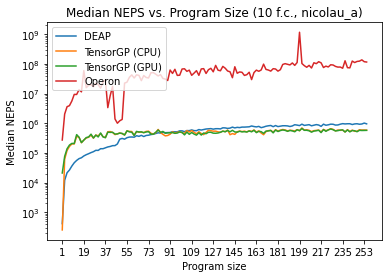

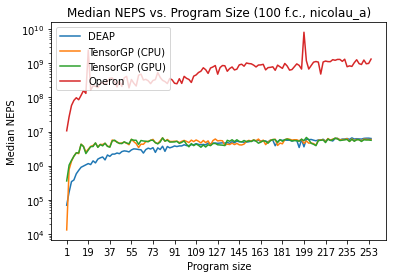

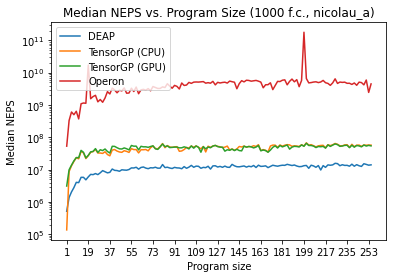

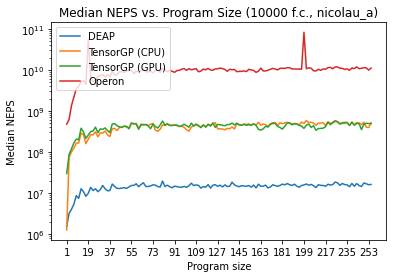

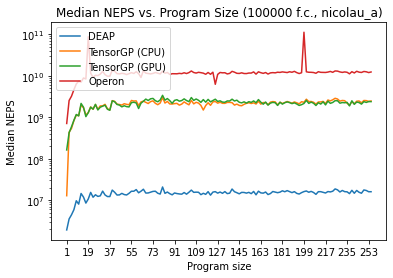

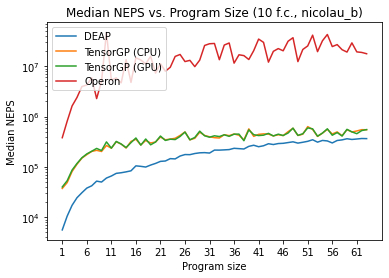

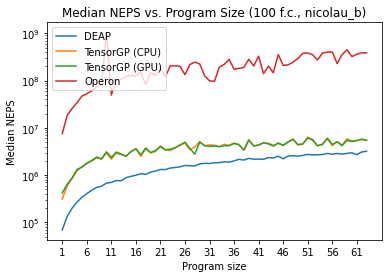

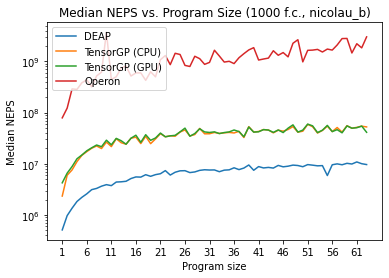

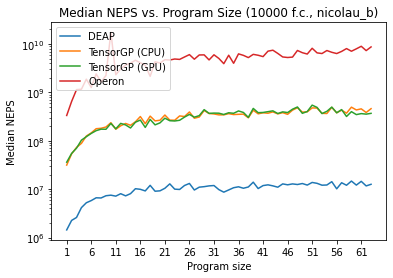

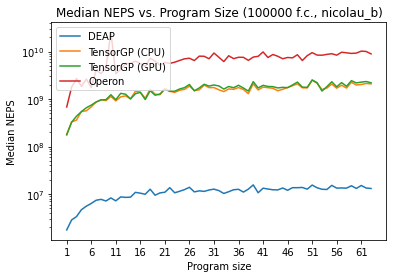

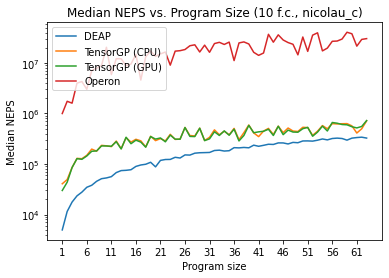

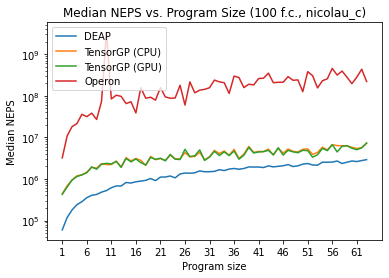

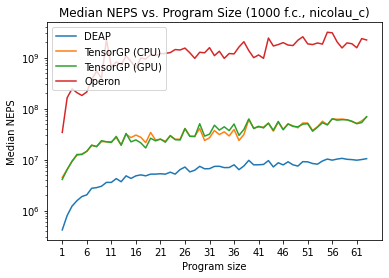

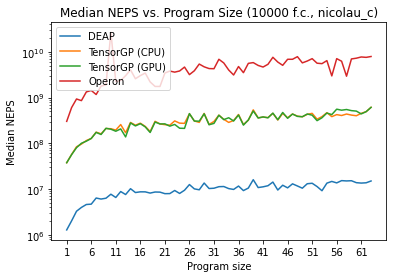

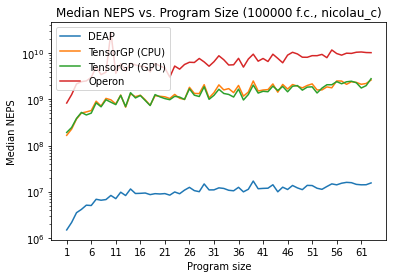

In [30]:
# Plot graph of median node evaluations per second for each tool, 
# for each number of fitness cases, for each function set.
for i, (name, (_, _, max_size, bin_size)) in enumerate(
    function_sets.items()):

    # Number of size bins.
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Index range for plot.
    index = range(1, num_size_bins+1)

    for j, nfc in enumerate(num_fitness_cases):
        for t, tool in enumerate(tools):
            x = index
            y = med_med_neps[t][i][j]
            iqr = iqr_med_neps[t][i][j]
            lower_bound = [y_ - iqr_ for y_, iqr_ in zip(y, iqr)]
            upper_bound = [y_ + iqr_ for y_, iqr_ in zip(y, iqr)]
            plt.plot(x, y, label=f'{tool}')
            plt.fill_between(x, lower_bound, upper_bound)
        plt.xlabel('Program size')
        plt.xticks(index, [str(size) for size in program_sizes[i]])
        plt.locator_params(axis='x', nbins=15)
        plt.ylabel('Median NEPS')
        plt.yscale('log')
        plt.title(f'Median NEPS vs. Program Size ({nfc} f.c., {name})')
        plt.legend(loc='upper left')
        plt.savefig(f'{graphics_dir}/{name}/median_neps_{nfc}.svg')
        plt.show()